# Gamma parameters

$$ \sigma^2 = 2\beta(t)^{\gamma -1} \\
    f(x,t) = \beta(t)^{\gamma} \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)} + \beta(t)^{\gamma-1} \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)}
$$

## $\gamma = 2$
Let $\gamma = 2$, the previous equation become :
$$ \sigma^2 = 2\beta(t) \\
    f(x,t) = \beta(t)^{2} \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)} + \beta(t) \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)}
$$

$$ \dot{x} = f(x(t),t) + g(x) \xi(t), \;\; \text{with}\;\; g(x) = \sigma^2 = 2\beta(t) $$

### Final Euler scheme by <i>Mannella </i>
$$ x(h) = x(0) +Z_1(h)\sqrt(2D) + f_0h $$ 
Where 
$$g(x) = \sigma = \sqrt{2\beta(t)} = \sqrt{2D}, \;\;  Z_1(h) = Y_1 \sqrt(h)\;\; \text{with} \;\; P(Y_1=y) = \frac{1}{\sqrt(2\pi)} e^{-\frac{1}{2}y^2}$$

Finally we have 
$$ x(h) = x(0) + \sigma Y_1 \sqrt(h) + hf_0 \\
   x(h) = x(0) +  \sqrt{2\beta(t)} Y_1 \sqrt(h) + hf_0 = x(0) +  Y_1\sqrt{2h\beta(t)} + hf_0 \\
   \boxed{x(h) = x(0) +  Y_1\sqrt{2h\beta(t)} + hf_0 }
$$

#### Recurrent expression
$$ \boxed{x_{n+1} = x_n + Y_1 \sqrt{2h\beta(t)} +f(x_n,t)h} $$
$$  x_1=x_0 $$

#### Force expression
$$ f(x,t) = \beta(t)^2 \nabla V(x) - \beta(t)\nabla U(x) $$

$$ f(x,t) = \beta(t)^2 \frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k) - \beta(t)\frac{1}{v_{pr}^{2}}x_k $$

 $$ \boxed{f(x,t) = \beta(t) \left( \beta(t)\frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k) - \frac{1}{v_{pr}^{2}}x_k \right)} $$

## $\gamma = 3$
Let $\gamma = 2$, the previous equation become :
$$ \sigma^2 = 2\beta(t)^2 \\
    f(x,t) = \beta(t)^{3} \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)} + \beta(t)^2 \frac{\mathcal{p}'_{li}(x)}{\mathcal{p}_{pr}(x)} $$

$$ \dot{x} = f(x(t),t) + g(x) \xi(t), \;\; \text{with}\;\; g(x) = \sigma^2 = 2\beta(t)^2 $$

$$ g(x) = \sigma = \beta(t)\sqrt{2} = \sqrt{2D} $$

Finally we have 
$$ x(h) = x(0) + \sigma Y_1 \sqrt{h} + hf_0 \\
   x(h) = x(0) +  \beta(t)\sqrt{2} Y_1 \sqrt{h} + hf_0 \\
   = x(0) +  Y_1\beta(t)\sqrt{2h} + hf_0 \\
$$

$$ \boxed{x_{n+1, k} = x_{n,k} +  \beta(t)Y_1\sqrt{2h} + hf(x_{n,k})} $$

#### Force expression
$$ f(x,t) = \beta(t)^3 \nabla V(x) - \beta(t)^2\nabla U(x) $$

$$ f(x,t) = \beta(t)^3 \frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k) - \beta(t)^2\frac{1}{v_{pr}^{2}}x_k $$

 $$ \boxed{f(x,t) = \beta(t)^2 \left( \beta(t)\frac{1}{v_{li}^{2}}\sum_{i=1}^{N}(d_{ik}-x_k) - \frac{1}{v_{pr}^{2}}x_k \right)} $$

### R[x(.)] expression :
From (33)
$$ R[x(.)] = \int_0^T \dot{\varphi}(x(t), t)dt, \;\; \beta(t)=\frac{t}{T} $$

$$\boxed{\int_0^T \dot{\varphi}(x(t),t) dt = \int_0^T \dot{\beta}(t)V(x) dt +  \ln Z_{li}} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
import time 

## Confidence interval : Gamma case

In [2]:
# SDEs version 2 gamma = 3
def SDEs_v2_3(Time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr):
    T  = Time ;    h  = time_step;    d    = obs_data;      vl = var_li 
    Y1 = Yval ;    X  = Xval     ;    tvec = Tvec  ;        vp = var_pr
    
    # Y1.shape(Nt, Np, N_step)
    Nd = d.shape[0];    Nt = Y1.shape[0];     Np = Y1.shape[1];   N_step = Y1.shape[2]
    Xsol = np.zeros((Nt, Np, N_step))      
    
    for k in range(N_step):
        t     = tvec[k]
                
        V_dot = (1/(vl^2))*(d[np.newaxis,:,:]-X[:,np.newaxis,:]).sum(1)  # V_dot.shape = (Nt,Nd,Np).sum(1)
        U_dot = (1/(vp^2))*X
        
        f           = ((t/T)^2)*((t/T)*V_dot - U_dot )                     #******** change *******
        X           = X + Y1[:,:,k]*(t/T)*np.sqrt(2*h) + h*f               #******** change *******
        Xsol[:,:,k] = X
        
    # R(X)
    ln_Zli = ((Nd*Np)/2)*np.log(2*np.pi*(vl)^2)
    V      = ((d[np.newaxis,:,:,np.newaxis]-Xsol[:,np.newaxis,:,:])^2).sum(1)
    V      = V.sum(1)
    
    g      = (1/T)*(1/(2*((vl)^2)))*V
    R      = np.trapz(g, tvec) + np.float(ln_Zli)
    exp_R  = np.exp(-R)
    
    return exp_R

In [3]:
# SDEs version 2 gamma = 2
def SDEs_v2_2(Time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr):
    T  = Time ;    h  = time_step;    d  = obs_data;      vl = var_li 
    Y1 = Yval ;    X  = Xval     ;    tvec = Tvec  ;      vp = var_pr
    
    # Y1.shape(Nt, Np, N_step)
    Nd = d.shape[0];    Nt = Y1.shape[0];     Np = Y1.shape[1];   N_step = Y1.shape[2]
    Xsol = np.zeros((Nt, Np, N_step))   
    
    for k in range(N_step):
        t     = tvec[k]
        
        V_dot = (1/(vl^2))*(d[np.newaxis,:,:]-X[:,np.newaxis,:]).sum(1)  # V_dot.shape = (Nt,Nd,Np).sum(1)
        U_dot = (1/(vp^2))*X
        
        f           = (t/T)*((t/T)*V_dot - U_dot )                     #******** change *******
        X           = X + Y1[:,:,k]*np.sqrt(2*h*(t/T)) + h*f           #******** change *******
        Xsol[:,:,k] = X
        
    # R(X)
    ln_Zli = ((Nd*Np)/2)*np.log(2*np.pi*(vl)^2)
    V      = ((d[np.newaxis,:,:,np.newaxis]-Xsol[:,np.newaxis,:,:])^2).sum(1)
    V      = V.sum(1)
    
    g      = (1/T)*(1/(2*((vl)^2)))*V
    R      = np.trapz(g, tvec) + np.float(ln_Zli)
    exp_R  = np.exp(-R)
    
    return exp_R

In [4]:
# SDEs version 1 gamma = 1
def SDEs4(Time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr):
    T  = Time ;    h  = time_step;    d  = obs_data;      vl = var_li 
    Y1 = Yval ;    X  = Xval     ;    tvec = Tvec  ;      vp = var_pr
    
    # Y1.shape(Nt, Np, N_step)
    Nd = d.shape[0];    Nt = Y1.shape[0];     Np = Y1.shape[1];   N_step = Y1.shape[2]
    Xsol = np.zeros((Nt, Np, N_step))   
    
    for k in range(N_step):
        t     = tvec[k]
        
        V_dot = (1/(vl^2))*(d[np.newaxis,:,:]-X[:,np.newaxis,:]).sum(1)  # V_dot.shape = (Nt,Nd,Np).sum(1)
        U_dot = (1/(vp^2))*X
        
        f           = (t/T)*V_dot - U_dot        
        X           = X + Y1[:,:,k]*np.sqrt(2*h) + h*f 
        Xsol[:,:,k] = X
        
    # R(X)
    ln_Zli = ((Nd*Np)/2)*np.log(2*np.pi*(vl)^2)
    V      = ((d[np.newaxis,:,:,np.newaxis]-Xsol[:,np.newaxis,:,:])^2).sum(1)
    V      = V.sum(1)
    
    g      = (1/T)*(1/(2*((vl)^2)))*V
    R      = np.trapz(g, tvec) + np.float(ln_Zli)
    exp_R  = np.exp(-R)
    
    return exp_R

## Convergence function on gamma

In [5]:
def converge_plot(n_conv, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr, true_modEv):
    n = n_conv
    N = n_conv*(Yval.shape[0])         # number of trajectory : Yval.shape[0]
    
    R_gam1 = np.array([])
    R_gam2 = np.array([])
    R_gam3 = np.array([])
    
    for i in range(n):
        R_ga1    = SDEs4(time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_gam1   = np.append(R_gam1, R_ga1) 
        
        R_ga2    = SDEs_v2_2(time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_gam2   = np.append(R_gam2, R_ga2)
        
        R_ga3    = SDEs_v2_3(time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_gam3   = np.append(R_gam3, R_ga3)
    
    np.savetxt('Gamma/R_gamma1Val.csv', R_gam1, delimiter=',')
    np.savetxt('Gamma/R_gamma2Val.csv', R_gam2, delimiter=',')
    np.savetxt('Gamma/R_gamma3Val.csv', R_gam3, delimiter=',')
    np.savetxt('Gamma/True_modEv.csv', true_modEv, delimiter=',')
    
    return 0

In [69]:
def converge_plot2(gamma):
    
    R_gam = np.array([])
    
    if gamma == 1 :
        R_gam = np.loadtxt('Gamma/R_gamma1Val.csv', delimiter=',')
        print("gamma 1")
    elif gamma == 2:
        R_gam = np.loadtxt('Gamma/R_gamma2Val.csv', delimiter=',')
        print("gamma 2")
    else :
        R_gam = np.loadtxt('Gamma/R_gamma3Val.csv', delimiter=',')
        print("gamma 3")
    
    true_ModEv = np.loadtxt('Gamma/True_modEv.csv', delimiter=',')
    
    N = len(R_gam)
    
    CI_vecL    = []
    CI_vecU    = []
    
    dataPt_CI  = []   
    N_mark     = int(N/30)
    
    # confidence interval
    Mark_CI    = []
    j          = N_mark
    Mark_pt    = []
    
    Nvec = np.logspace(1, np.log10(N), 20)
    for j in Nvec:
        j         = int(j)
        
        Rgam      = R_gam[:j]                                      
        zeta_gam  = np.sqrt(((1/(len(Rgam)-1))*np.sum((Rgam-np.mean(Rgam))**2)))      # variance over N
        
        CI_lower  = -np.log(1 + np.sqrt(2/len(Rgam))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rgam)))))
        CI_upper  = -np.log(1 - np.sqrt(2/len(Rgam))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rgam)))))       
        a = np.sqrt(2/len(Rgam))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rgam))))
               
        CI_vecL.append(CI_lower+np.log(np.mean(Rgam))) 
        CI_vecU.append(CI_upper+np.log(np.mean(Rgam)))
        dataPt_CI.append(j) 
        
        Mark_CI.append([CI_lower+np.log(np.mean(Rgam)), CI_upper+np.log(np.mean(Rgam))])        
        Mark_pt.append([j,j])
        
        
    modEv_gam  = []
    dataPt_vect = []
    # JE estimation 
    Nvec = np.logspace(1, np.log10(N), 50)
    for j in Nvec :
        j         = int(j)
        Rvec_gam  = R_gam[:j]
        Rmean_gam = float(np.mean(Rvec_gam))
        
        dataPt_vect.append(j)
        modEv_gam.append(Rmean_gam)
        
    dataPt_vect = np.array(dataPt_vect)
    modEv_gam   = np.array(modEv_gam)
    
    CI_vecL     = np.array(CI_vecL)
    CI_vecU     = np.array(CI_vecU)
    dataPt_CI   = np.array(dataPt_CI)
    
    #######################""test
    val = 10000
    Rgam      = R_gam[:val]
    zeta_gam  = np.sqrt(((1/(len(Rgam)-1))*np.sum((Rgam-np.mean(Rgam))**2)))
    
    CI_lower  = -np.log(1 + np.sqrt(2/len(Rgam))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rgam)))))
    CI_upper  = -np.log(1 - np.sqrt(2/len(Rgam))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rgam)))))
    print("upper", CI_upper)
    
    a1 = CI_lower+np.log(np.mean(Rgam)) 
    a2 = CI_upper+np.log(np.mean(Rgam))
    aa  = np.log(float(np.mean(Rgam)))
    print("R = ",len(Rgam),"val",np.log(float(np.mean(Rgam))))
    
    zeta_gam2  = np.sqrt(((1/(len(R_gam)-1))*np.sum((R_gam-np.mean(R_gam))**2)))
    
    CI_lower2  = -np.log(1 + np.sqrt(2/len(R_gam))*((zeta_gam2*special.erfinv(0.95))/(np.float(np.mean(R_gam)))))
    CI_upper2  = -np.log(1 - np.sqrt(2/len(R_gam))*((zeta_gam2*special.erfinv(0.95))/(np.float(np.mean(R_gam))))) 
    
    a12 = CI_lower2+np.log(np.mean(R_gam)) 
    a22 = CI_upper2+np.log(np.mean(R_gam))
    aa2  = np.log(float(np.mean(R_gam)))
    print("R = ",len(R_gam),"val",np.log(float(np.mean(R_gam))))
    
    L = [a1, a2, aa, abs(a1) - abs(a2), abs(abs(true_ModEv[1])-abs(aa)),"ok", a12, a22, aa2, abs(a12) - abs(a22), abs(abs(true_ModEv[1])-abs(aa2))]
    #####################  end test
    
    sol_Gam = [modEv_gam, CI_vecL,  CI_vecU,  np.mean(R_gam), Mark_CI]
    sol = [dataPt_vect, dataPt_CI, Mark_pt, sol_Gam, true_ModEv, L]      
    
    print(len(R_gam))
    print("#R :",N," model evidence estimation :", sol_Gam[3], " log val      :", np.log(sol_Gam[3]))
    print("True value model evidence                 :", true_ModEv[0], " log value :",true_ModEv[1])
    
    return sol

In [ ]:
n_param      = 5                                                     # number of parameters
n_traj       = 1000                                                    # number of trajectories
n_dataPt     = 10                                                    # number of data point d=(d_1, ..., d_N)
Time         = 2.0                                                    # duration of process
time_step    = 0.001
var_li       = 1.0
var_pr       = 2.5     
var_data     = 0.5
N_step       = int(Time/time_step)   
N_conv       = 1000
mu_data      = 0


Nt = n_traj
Np = n_param

# data generation
obs_data = np.random.normal(loc=mu_data, scale=var_data, size=(n_dataPt, n_param))      # observed data
Xval     = np.random.normal(loc=0, scale=var_pr, size=(Nt, Np)) 
Yval     = np.random.randn(Nt, Np, N_step)
Tvec     = np.linspace(0,Time, N_step)

In [8]:
# true value : direct method
vl = var_li
vp = var_pr
N  = n_dataPt
M  = n_param 

d  = obs_data

A = (2*np.pi*(vl^2))^(-N/2)         
B = np.sqrt((vl^2)/(N*(vp^2)+(vl^2)))
C = 1/(2*(vl^2))
D = ((vp^2)/(N*(vp^2)+(vl^2)))
q = 1
for j in range(M):
    q = q*A*B*exp(C*(D*((d[:,j]).sum())^2 - ((d[:,j])^2).sum()))
    
modEv = np.array([q, np.float(np.log(q))])

print("Log Model evidence ", modEv[1])
print("Model evidence ", modEv[0])

('Log Model evidence ', -61.01472413362745)
('Model evidence ', 3.1742563270611342e-27)


In [10]:

# exp log model evidence
A = (2*np.pi*(vl^2))^(-N/2)          
B = np.sqrt((vl^2)/(N*(vp^2)+(vl^2)))
C = 1/(2*(vl^2))
D = ((vp^2)/(N*(vp^2)+(vl^2)))
q = 1

log_modEv = M*np.log(A*B) + C*D*(((np.sum(d, axis=0))^2).sum()) - C*((np.sum(d^2, axis=0)).sum())
print("Log Model evidence ", float(log_modEv))  

exp_modEv = np.exp(float(log_modEv))
print("Model evidence ", exp_modEv)

('Log Model evidence ', -62.16339056474578)
('Model evidence ', 1.0064275144759497e-27)


In [78]:
# data generation
start_time = time.time()
converge_plot(N_conv, Time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr, modEv)
times = time.time()-start_time

print('times (seconde)', times)
print('times (minute)', times/60)

('times (seconde)', 8.671227931976318)
('times (minute)', 0.14452046553293865)


In [108]:
gam  = 1
Sol1 = converge_plot2(gam)
#Sol1[3][4]

gamma 1
('upper', 0.18833321998047203)
('R = ', 10000, 'val', -59.406016329936556)
('R = ', 1000000, 'val', -59.406016329936556)
1000000
('#R :', 1000000, ' model evidence estimation :', 1.5859698102951565e-26, ' log val      :', -59.406016329936556)
('True value model evidence                 :', 1.6393149067712133e-26, ' log value :', -59.372934003060294)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in log


In [109]:
np.log(Sol1[3][0])

In [163]:
Sol1[3][4]

In [111]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol1[5]

[-59.564439035436436,
 -59.217683109956084,
 -59.406016329936556,
 0.34675592548035183,
 0.03308232687626145,
 'ok',
 -59.42303595693323,
 -59.388702012478454,
 -59.406016329936556,
 0.034333944454772336,
 0.03308232687626145]

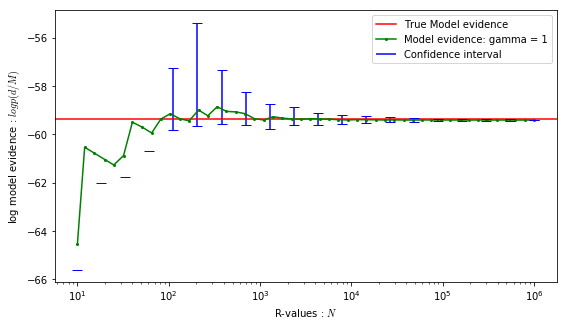

In [112]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol1[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol1[0], np.log(Sol1[3][0]), color='g',      label="Model evidence: gamma = 1", marker="o", markersize=2) 
plt.vlines(Sol1[1], Sol1[3][1], Sol1[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol1[2], Sol1[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : $gamma = 1$ ")
plt.legend()
plt.savefig('Img/im_gamma1.png') 
plt.show()

In [113]:
gam = 2
Sol2 = converge_plot2(gam)

gamma 2
('upper', 0.3583430121018229)
('R = ', 10000, 'val', -59.13690895870866)
('R = ', 1000000, 'val', -59.13690895870866)
1000000
('#R :', 1000000, ' model evidence estimation :', 2.0757104053976636e-26, ' log val      :', -59.13690895870866)
('True value model evidence                 :', 1.6393149067712133e-26, ' log value :', -59.372934003060294)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in log


In [114]:
np.log(Sol2[3][0])

In [160]:
Sol2[3][4]

In [161]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol2[5]

[-66.10684006877665,
 -61.94366908012029,
 -65.42913124604206,
 4.163170988656361,
 1.4637379648077982,
 'ok',
 -65.45930980968598,
 -65.39801352064906,
 -65.42913124604206,
 0.06129628903691753,
 1.4637379648077982]

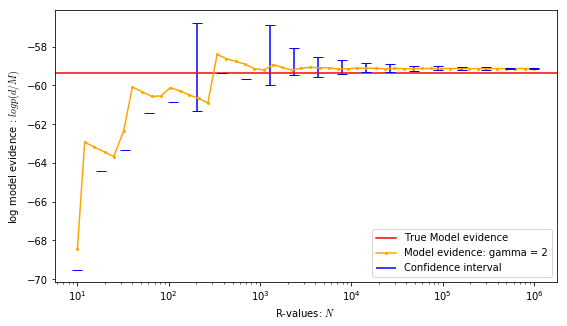

In [119]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol2[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol2[0], np.log(Sol2[3][0]), color='orange',      label="Model evidence: gamma = 2", marker="o", markersize=2) 
plt.vlines(Sol2[1], Sol2[3][1], Sol2[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol2[2], Sol2[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values: $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : $Gamma = 2$ ")
plt.legend()
plt.savefig('Img/im_gamma2.png', transparent = True) 
plt.show()

In [120]:
gam = 3
Sol3 = converge_plot2(gam)

gamma 3
('upper', 0.38801115754089344)
('R = ', 10000, 'val', -59.34300420375317)
('R = ', 1000000, 'val', -59.34300420375317)
1000000
('#R :', 1000000, ' model evidence estimation :', 1.6891208966404884e-26, ' log val      :', -59.34300420375317)
('True value model evidence                 :', 1.6393149067712133e-26, ' log value :', -59.372934003060294)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:40: RuntimeWarning: invalid value encountered in log


In [105]:
np.log(Sol3[3][0])

In [162]:
Sol3[3][4]

In [107]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol3[5]

[-61.82232819968297,
 -61.175818488222305,
 -61.550434860383746,
 0.6465097114606664,
 0.940433031126048,
 'ok',
 -61.581199880560845,
 -61.51869322880005,
 -61.550434860383746,
 0.06250665176079195,
 0.940433031126048]

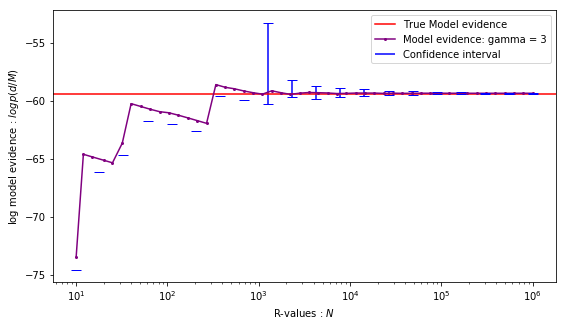

In [37]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol3[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol3[0], np.log(Sol3[3][0]), color='purple',      label="Model evidence: gamma = 3", marker="o", markersize=2) 
plt.vlines(Sol3[1], Sol3[3][1], Sol3[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol3[2], Sol3[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : $Gamma = 3$")
plt.legend()
plt.savefig('Img/im_gamma3.png', transparent = True) 
plt.show()

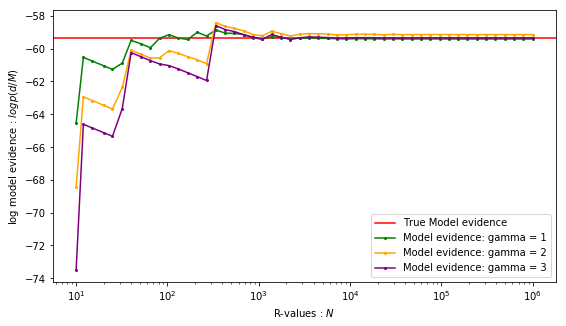

In [40]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol3[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol1[0], np.log(Sol1[3][0]), color='g',      label="Model evidence: gamma = 1", marker="o", markersize=2) 
plt.plot(Sol2[0], np.log(Sol2[3][0]), color='orange', label="Model evidence: gamma = 2", marker="o", markersize=2) 
plt.plot(Sol3[0], np.log(Sol3[3][0]), color='purple', label="Model evidence: gamma = 3", marker="o", markersize=2) 
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : Gamma =1,2,3")
plt.legend()
plt.savefig('Img/im_gamma.png', transparent = True) 
plt.show()

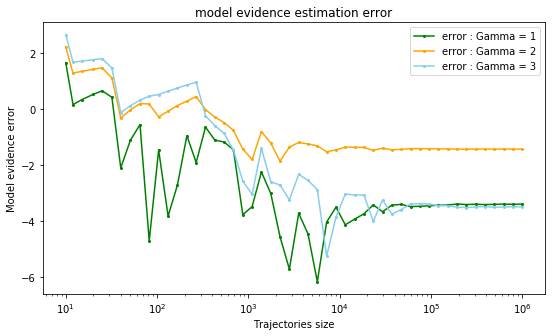

In [39]:
# estimation error
error1 = np.abs(Sol1[4][1]-np.log(Sol1[3][0]))

# color : red, yellow, cyan, blue, navy, skyblue, green, orange
plt.figure(figsize=(9,5))
plt.plot(Sol1[0], np.log(np.abs(Sol1[4][1]-np.log(Sol1[3][0]))), color='g', label="error : Gamma = 1", marker="o", markersize=2)
plt.plot(Sol1[0], np.log(np.abs(Sol2[4][1]-np.log(Sol2[3][0]))), color='orange', label="error : Gamma = 2", marker="o", markersize=2)
plt.plot(Sol1[0], np.log(np.abs(Sol3[4][1]-np.log(Sol3[3][0]))), color='skyblue', label="error : Gamma = 3", marker="o", markersize=2)
plt.xscale('log')
plt.xlabel("Trajectories size")
plt.ylabel("Model evidence error")
plt.title("model evidence estimation error")
plt.legend()
plt.savefig('Img/gamma_erros.png', transparent = True) 
plt.show()

# beta parameters

## lagrange interpolation for $\beta(t)$
* for the simple case where $\beta(0) = 0$  and $\beta(T)=1$, $(0, 0), (T,1)$, we got 
$$ \beta(t) = \frac{t}{T} $$

* for $(0,0), (1,2), (T,1)$ we have :

In [9]:
# Lagrange interpolation function
def Lagrange_beta(X, Y):
    L = []
    for i in range(len(X)):
        num = 1
        den = 1
        for j in range(len(X)):
            if j != i :
                num = num*(u-X[j])
                den = den*(X[i]-X[j])
                
        tmp = (num/den)*Y[i] 
        L.append(tmp)
        
    P = np.array(L)
    return np.sum(P)

In [10]:
# (0,0), (1,2), (T,1)
T = 2.0
P1(u) = Lagrange_beta([0,T],[0,1])                                        # linear    Beta
P2(u) = Lagrange_beta([0,1,T],[0,2,1])                                    # overshoot Beta
P3(u) = Lagrange_beta([0,1,T],[0,0.2,1])                                  # slow      Beta
P4(u) = Lagrange_beta([0,1,T],[0,1,1])                                    # just      Beta

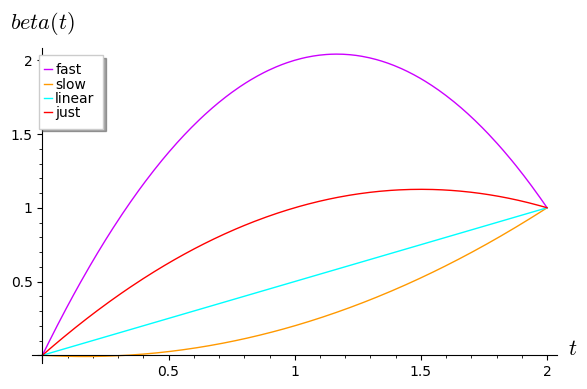

In [11]:
p2 = plot(P2, (u,0,2), color=hue(0.8), legend_label = 'fast', axes_labels=["$t$", '$beta(t)$'])
p4 = plot(P4, (u,0,2), color=hue(3.0), legend_label = 'just')
p1 = plot(P1, (u,0,2), color=hue(0.5), legend_label = 'linear') 
p3 = plot(P3, (u,0,2), color=hue(1.1), legend_label = 'slow')
P  = p2+p3+p1+p4
P.set_legend_options(ncol=1, loc=2)
P

In [12]:
P.save("beta_class.png")

## $\beta(t)$
* overshoot 
* just
* linear
* slow

In [13]:
# SDEs version overshoot beta
def SDEs4(P, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr):
    beta(u) = P
    T  = Time ;    h  = time_step;    d  = obs_data;      vl = var_li 
    Y1 = Yval ;    X  = Xval     ;    tvec = Tvec  ;      vp = var_pr
    
    # Y1.shape(Nt, Np, N_step)
    Nd = d.shape[0];    Nt = Y1.shape[0];     Np = Y1.shape[1];   N_step = Y1.shape[2]
    Xsol = np.zeros((Nt, Np, N_step))  
    
    for k in range(N_step):
        t     = tvec[k]
        
        V_dot = (1/(vl^2))*(d[np.newaxis,:,:]-X[:,np.newaxis,:]).sum(1)  # V_dot.shape = (Nt,Nd,Np).sum(1)
        U_dot = (1/(vp^2))*X
        
        b = np.array([beta(t)], float) 
        #print(b[0])
        f           = b[0]*V_dot - U_dot                             # ******* change beta function ****
        X           = X + Y1[:,:,k]*np.sqrt(2*h) + h*f 
        Xsol[:,:,k] = X
        
    # R(X)
    ln_Zli = ((Nd*Np)/2)*ln(2*np.pi*(vl)^2)
    V      = ((d[np.newaxis,:,:,np.newaxis]-Xsol[:,np.newaxis,:,:])^2).sum(1)
    V      = V.sum(1)
    
    beta_dot(u)   = beta.derivative(u,1)                                # ****** change
    vec_beta_dot  = np.array([beta_dot(i) for i in tvec], float)        # ****** change
    
    g      = np.multiply(vec_beta_dot,V)*(1/(2*((vl)^2)))               # ****** change beta derivative  *****
    R      = np.trapz(g, tvec) + float(ln_Zli)
    exp_R  = np.exp(-R)
    
    return exp_R

## Convergence interval

In [14]:
def converge_plot(P1, P2, P3, P4, N_rep, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr, true_modEv):
    n = N_rep
    N = N_rep*(Yval.shape[0])         # number of trajectory : Yval.shape[0]
    
    R_beta1 = np.array([])  # linear
    R_beta2 = np.array([])  # overshoot
    R_beta3 = np.array([])  # slow
    R_beta4 = np.array([])  # just
    
    for i in range(n):
        R1      = SDEs4(P1, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_beta1 = np.append(R_beta1, R1)
        
        R2      = SDEs4(P2, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_beta2 = np.append(R_beta2, R2)
        
        R3      = SDEs4(P3, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_beta3 = np.append(R_beta3, R3)
        
        R4      = SDEs4(P4, time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr)
        R_beta4 = np.append(R_beta4, R4)
    
    np.savetxt('Beta/R_beta_linear.csv',    R_beta1, delimiter=',')
    np.savetxt('Beta/R_beta_slow.csv',      R_beta3, delimiter=',')
    np.savetxt('Beta/R_beta_overshoot.csv', R_beta2, delimiter=',')
    np.savetxt('Beta/R_beta_just.csv',      R_beta4, delimiter=',')
    np.savetxt('Beta/True_modEv.csv',       true_modEv, delimiter=',')
      
    return 0

In [50]:
def converge_plotBeta(beta):
    
    R_beta = np.array([])
    
    if beta=="overshoot":
        R_beta = np.loadtxt('Beta/R_beta_overshoot.csv', delimiter=',')
        print("overshoot beta")
    elif beta=="just":
        R_beta = np.loadtxt('Beta/R_beta_just.csv', delimiter=',')
        print("just beta")
    elif beta=="linear":
        R_beta = np.loadtxt('Beta/R_beta_linear.csv', delimiter=',')
        print("linear beta")
    else :
        R_beta = np.loadtxt('Beta/R_beta_slow.csv', delimiter=',')
        print("slow beta")
        
    true_ModEv = np.loadtxt('Beta/True_modEv.csv', delimiter=',')
        
    N = len(R_beta)
    
    CI_vecL    = []
    CI_vecU    = []
    
    dataPt_CI  = []   
    N_mark     = int(N/30)
    
    # confidence interval
    Mark_CI    = []
    j          = N_mark
    Mark_pt    = []
    
    Nvec = np.logspace(1, np.log10(N), 20)
    for j in Nvec:
        j         = int(j)
        Rbeta      = R_beta[:j]
        #zeta_beta  = np.sqrt(np.var(Rbeta))
        zeta_beta  = np.sqrt(((1/(len(Rbeta)-1))*np.sum((Rbeta-np.mean(Rbeta))**2)))
        
        CI_lower  = -np.log(1 + np.sqrt(2/len(Rbeta))*((zeta_beta*special.erfinv(0.95))/(np.float(np.mean(Rbeta)))))
        CI_upper  = -np.log(1 - np.sqrt(2/len(Rbeta))*((zeta_beta*special.erfinv(0.95))/(np.float(np.mean(Rbeta)))))
             
        CI_vecL.append(CI_lower+np.log(np.mean(Rbeta)))
        CI_vecU.append(CI_upper+np.log(np.mean(Rbeta)))
        dataPt_CI.append(j) 
        
        Mark_CI.append([CI_lower+np.log(np.mean(Rbeta)), CI_upper+np.log(np.mean(Rbeta))])
        Mark_pt.append([j,j])
    
    modEv_beta  = []; modEv_gam2 = []; modEv_gam3  = []
    dataPt_vect = []
    
    # JE estimation 
    Nvec = np.logspace(1, np.log10(N), 50)
    for j in Nvec :
        j          = int(j)
        Rvec_beta  = R_beta[:j]
        Rmean_beta = float(np.mean(Rvec_beta))
        
        dataPt_vect.append(j)
        modEv_beta.append(Rmean_beta)
        
    dataPt_vect = np.array(dataPt_vect)
    modEv_beta  = np.array(modEv_beta)
    
    CI_vecL     = np.array(CI_vecL)
    CI_vecU     = np.array(CI_vecU)
    dataPt_CI   = np.array(dataPt_CI)
    
    #######################""test
    val = 1000
    Rbeta      = R_beta[:val]
    zeta_gam  = np.sqrt(((1/(len(Rbeta)-1))*np.sum((Rbeta-np.mean(Rbeta))**2)))
    
    CI_lower  = -np.log(1 + np.sqrt(2/len(Rbeta))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rbeta)))))
    CI_upper  = -np.log(1 - np.sqrt(2/len(Rbeta))*((zeta_gam*special.erfinv(0.95))/(np.float(np.mean(Rbeta)))))
    #print("upper", CI_upper)
    
    a1 = CI_lower+np.log(np.mean(Rbeta)) 
    a2 = CI_upper+np.log(np.mean(Rbeta))
    aa  = np.log(float(np.mean(Rbeta)))
    print("R = ",len(Rbeta),"val",np.log(float(np.mean(Rbeta))) )
    
    zeta_gam2  = np.sqrt(((1/(len(R_beta)-1))*np.sum((R_beta-np.mean(R_beta))**2)))
    
    CI_lower2  = -np.log(1 + np.sqrt(2/len(R_beta))*((zeta_gam2*special.erfinv(0.95))/(np.float(np.mean(R_beta)))))
    CI_upper2  = -np.log(1 - np.sqrt(2/len(R_beta))*((zeta_gam2*special.erfinv(0.95))/(np.float(np.mean(R_beta))))) 
    
    a12 = CI_lower2+np.log(np.mean(R_beta)) 
    a22 = CI_upper2+np.log(np.mean(R_beta))
    aa2  = np.log(float(np.mean(R_beta)))
    print("R = ",len(R_beta),"val",np.log(float(np.mean(R_beta))) )
    
    L = [a1, a2, aa, abs(a1) - abs(a2), abs(abs(true_ModEv[1])-abs(aa)),"ok", a12, a22, aa2, abs(a12) - abs(a22), abs(abs(true_ModEv[1])-abs(aa2))]
    #####################  end test
    
    
    sol_beta = [modEv_beta, CI_vecL,  CI_vecU,  np.mean(R_beta), Mark_CI]  
    sol = [dataPt_vect, dataPt_CI, Mark_pt, sol_beta, true_ModEv, L]  
    
    print("#R :",N," model evidence estimation :", sol_beta[3], " log val      :", np.log(sol_beta[3]))
    print("True value model evidence                 :", true_ModEv[0], " log value :",true_ModEv[1])
    
    return sol

In [20]:
10e3

10000.0000000000

In [29]:
n_param      = 5                                                     # number of parameters
n_traj       = 1000                                                    # number of trajectories
n_dataPt     = 10                                                    # number of data point d=(d_1, ..., d_N)
Time         = 2.0                                                    # duration of process
time_step    = 0.001
var_li       = 1.0
var_pr       = 2.5     
var_data     = 0.5
N_step       = int(Time/time_step)   
N_Rep       = 2
mu_data      = 0


Nt = n_traj
Np = n_param

# data generation
obs_data = np.random.normal(loc=mu_data, scale=var_data, size=(n_dataPt, n_param))      # observed data
Xval     = np.random.normal(loc=0, scale=var_pr, size=(Nt, Np)) 
Yval     = np.random.randn(Nt, Np, N_step)
Tvec     = np.linspace(0,Time, N_step)

In [30]:
# true value : direct method
vl = var_li
vp = var_pr
N  = n_dataPt
M  = n_param 

d  = obs_data

A = (2*np.pi*(vl^2))^(-N/2)         # A is close to zero when N get large (N>5) this is why we get 0 in this case
B = np.sqrt((vl^2)/(N*(vp^2)+(vl^2)))
C = 1/(2*(vl^2))
D = ((vp^2)/(N*(vp^2)+(vl^2)))
q = 1
for j in range(M):
    q = q*A*B*exp(C*(D*((d[:,j]).sum())^2 - ((d[:,j])^2).sum()))
    
modEv = np.array([q, np.float(np.log(q))])

print("Model evidence ", modEv[0])
print("Log Model evidence ", modEv[1])

('Model evidence ', 2.163446807952603e-27)
('Log Model evidence ', -61.39809481656794)


In [ ]:
# data generation
start_time = time.time()
converge_plot(P1, P2, P3, P4, N_Rep, Time, time_step, obs_data, Xval, Yval, Tvec, var_li, var_pr, modEv)
times = time.time()-start_time

print('times (seconde)', times)
print('times (minute)', times/60)

In [164]:
Beta = "linear"
Sol = converge_plotBeta(Beta)

linear beta
('R = ', 1000, 'val', -61.71293404278608)
('R = ', 1000000, 'val', -61.71293404278608)
('#R :', 1000000, ' model evidence estimation :', 1.5791132701216064e-27, ' log val      :', -61.71293404278608)
('True value model evidence                 :', 1.7044628015490773e-27, ' log value :', -61.63654752215473)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:41: RuntimeWarning: invalid value encountered in log


In [165]:
Sol[3][4]

In [166]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol[5]

[-62.336735662411265,
 -59.702955657938304,
 -61.71293404278608,
 2.6337800044729605,
 0.07638652063135254,
 'ok',
 -61.73993803919599,
 -61.68518054419165,
 -61.71293404278608,
 0.05475749500433835,
 0.07638652063135254]

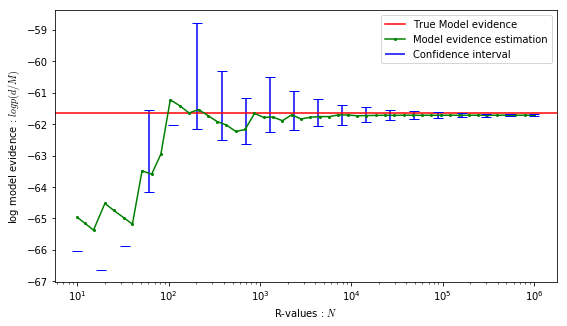

In [124]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol[0], np.log(Sol[3][0]), color='g',      label="Model evidence estimation", marker="o", markersize=2) 
plt.vlines(Sol[1], Sol[3][1], Sol[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol[2], Sol[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : linear beta")
plt.legend()
plt.savefig('Img/im_betaLinear.png', transparent = True) 
plt.show()

In [167]:
Beta = "overshoot"
Sol2 = converge_plotBeta(Beta)

overshoot beta
('R = ', 1000, 'val', -61.19384320366782)
('R = ', 1000000, 'val', -61.19384320366782)
('#R :', 1000000, ' model evidence estimation :', 2.65369844646066e-27, ' log val      :', -61.19384320366782)
('True value model evidence                 :', 1.7044628015490773e-27, ' log value :', -61.63654752215473)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:41: RuntimeWarning: invalid value encountered in log
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:76: RuntimeWarning: invalid value encountered in log


In [152]:
Sol2[3][4]

In [168]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol2[5]

[-62.08291272450441,
 nan,
 -61.19384320366782,
 nan,
 0.4427043184869106,
 'ok',
 -61.23813615337441,
 -61.14749709699776,
 -61.19384320366782,
 0.09063905637665215,
 0.4427043184869106]

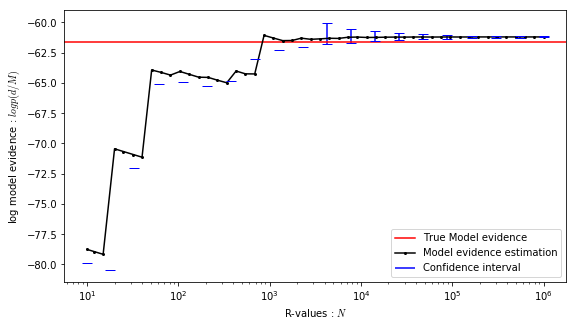

In [135]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol2[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol2[0], np.log(Sol2[3][0]), color='black',      label="Model evidence estimation", marker="o", markersize=2) 
plt.vlines(Sol2[1], Sol2[3][1], Sol2[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol2[2], Sol2[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : overshoot beta")
plt.legend()
plt.savefig('Img/im_betaOvershoot.png', transparent = True) 
plt.show()

In [169]:
Beta = "just"
Sol4 = converge_plotBeta(Beta)

just beta
('R = ', 1000, 'val', -61.42597607385132)
('R = ', 1000000, 'val', -61.42597607385132)
('#R :', 1000000, ' model evidence estimation :', 2.1039603233787136e-27, ' log val      :', -61.42597607385132)
('True value model evidence                 :', 1.7044628015490773e-27, ' log value :', -61.63654752215473)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:41: RuntimeWarning: invalid value encountered in log
/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:76: RuntimeWarning: invalid value encountered in log


In [170]:
Sol4[3][4]

In [171]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol4[5]

[-62.25669567600118,
 nan,
 -61.42597607385132,
 nan,
 0.210571448303412,
 'ok',
 -61.46609069004611,
 -61.384184781797714,
 -61.42597607385132,
 0.08190590824839461,
 0.210571448303412]

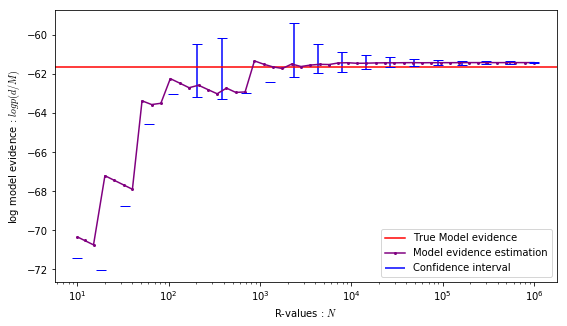

In [33]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol4[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol4[0], np.log(Sol4[3][0]), color='purple',      label="Model evidence estimation", marker="o", markersize=2) 
plt.vlines(Sol4[1], Sol4[3][1], Sol4[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol4[2], Sol4[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : Just beta")
plt.legend()
plt.savefig('Img/im_betaJust.png', transparent = True) 
plt.show()

In [172]:
Beta = "slow"
Sol3 = converge_plotBeta(Beta)

slow beta
('R = ', 1000, 'val', -62.11909294828202)
('R = ', 1000000, 'val', -62.11909294828202)
('#R :', 1000000, ' model evidence estimation :', 1.0520120436192067e-27, ' log val      :', -62.11909294828202)
('True value model evidence                 :', 1.7044628015490773e-27, ' log value :', -61.63654752215473)


/usr/lib/python2.7/dist-packages/sage/repl/ipython_kernel/__main__.py:41: RuntimeWarning: invalid value encountered in log


In [173]:
Sol3[3][4]

In [174]:
# print the CI, the CI length, and the estimate error and solution for N = 10^2, and 10^6 trajectories
Sol3[5]

[-62.71138444746227,
 -60.46817139886584,
 -62.11909294828202,
 2.243213048596431,
 0.4825454261272881,
 'ok',
 -62.144314641705506,
 -62.09321862512153,
 -62.11909294828202,
 0.05109601658397622,
 0.4825454261272881]

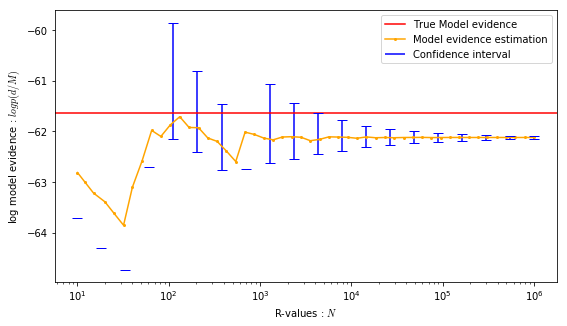

In [37]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol3[4][1], linestyle='-',    label="True Model evidence", color='r') 
plt.plot(Sol3[0], np.log(Sol3[3][0]), color='orange',      label="Model evidence estimation", marker="o", markersize=2) 
plt.vlines(Sol3[1], Sol3[3][1], Sol3[3][2], colors='b', linestyles='solid', label='Confidence interval')
plt.plot(Sol3[2], Sol3[3][4], color='b', linestyle = 'none', marker = '_', c = 'lime', markersize = 10)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : slow beta")
plt.legend()
plt.savefig('Img/im_betaSlow.png', transparent = True) 
plt.show()

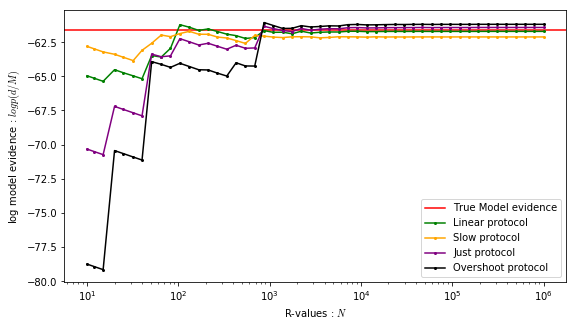

In [38]:
# color : red, yellow, cyan, blue, navy, skyblue, green, orange, purple
plt.figure(figsize=(9,5))
np.logspace(1,4,20)
plt.axhline(y = Sol3[4][1], linestyle='-',    label="True Model evidence", color='r')
plt.plot(Sol[0], np.log(Sol[3][0]), color='g',      label="Linear protocol", marker="o", markersize=2) 
plt.plot(Sol3[0], np.log(Sol3[3][0]), color='orange', label="Slow protocol", marker="o", markersize=2) 
plt.plot(Sol4[0], np.log(Sol4[3][0]), color='purple',      label="Just protocol", marker="o", markersize=2) 
plt.plot(Sol2[0], np.log(Sol2[3][0]), color='black',      label="Overshoot protocol", marker="o", markersize=2) 
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("log model evidence : $log p(d/M)$")
#plt.title("Convergence plots : slow beta")
plt.legend()
plt.savefig('Img/im_beta.png', transparent = True) 
plt.show()

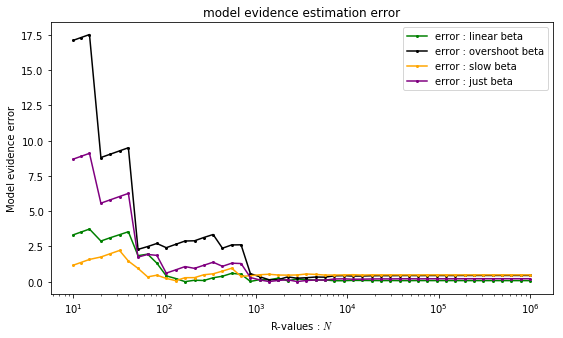

In [112]:
# estimation error
error1 = np.abs(Sol[4][0]-Sol[3][0])

# color : red, yellow, cyan, blue, navy, skyblue, green, orange
plt.figure(figsize=(9,5))
plt.plot(Sol[0], np.abs(Sol[4][1]-np.log(Sol[3][0])), color='g', label="error : linear beta", marker="o", markersize=2)
plt.plot(Sol[0], np.abs(Sol2[4][1]-np.log(Sol2[3][0])), color='black', label="error : overshoot beta", marker="o", markersize=2)
plt.plot(Sol[0], np.abs(Sol3[4][1]-np.log(Sol3[3][0])), color='orange', label="error : slow beta", marker="o", markersize=2)
plt.plot(Sol[0], np.abs(Sol4[4][1]-np.log(Sol4[3][0])), color='purple', label="error : just beta", marker="o", markersize=2)
plt.xscale('log')
plt.xlabel("R-values : $N$")
plt.ylabel("Model evidence error")
plt.title("model evidence estimation error")
plt.legend()
plt.savefig('Img/im_betaError.png', transparent = True) 
plt.show()